In [46]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt, seaborn as sns

# The problem

Calculate the f1 for Thursdays... this is not a trick question! We will search for the first 5 d.p. in your CV

## Data

First up, looking at the raw data in a text editor makes it clear that the data format is year-month-day, so reading it in:

Note: Pandas datetime has Monday=0, Sunday=6, so Thursday is 3.

In [4]:
df = pd.read_csv("data/test.psv", sep="|", parse_dates=["dates"])

# and since we need to filter by a particular day lets put in a day col
df["day_of_week"] = df["dates"].apply(lambda x: x.weekday())

df.head()

,dates,y,yhat,day_of_week
0,1999-11-01,0,0,0
1,1999-11-02,0,1,1
2,1999-11-03,1,1,2
3,1999-11-04,1,0,3
4,1999-11-05,0,1,4


In [182]:
f1_scores = []
days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

print("--F1 scores--")
for day in np.arange(7):
    ma = df["day_of_week"] == day
    f1 = f1_score(df[ma].y, df[ma].yhat)
    f1_scores.append(f1)
    print(f"{days[day]}:  {f1:.5f}")

--F1 scores--
Mon:  0.52174
Tue:  0.45161
Wed:  0.55172
Thu:  0.30769
Fri:  0.28571
Sat:  0.42857
Sun:  0.46154


## Visual version of above

Using matplotlib and seaborn (for the pretty colours)

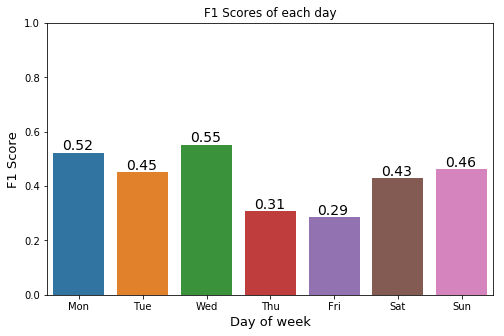

In [50]:
fig, ax = plt.subplots(figsize=(8,5))

ax.set_title("F1 Scores of each day")
sns.barplot(x=days, y=f1_scores, ax=ax)

ax.set_ylabel("F1 Score", fontsize=13)
ax.set_xlabel("Day of week", fontsize=13)
ax.set_ylim(0,1)

# labelling the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', xy=(p.get_x()+0.14, p.get_height()+0.01), fontsize=14)

## Interactive version

Using [Panel](https://panel.pyviz.org/index.html).

Now the following foesn't actually make sense as its better to see all the 7 days in one go to compare f1 scores but say for some reason we want to only see the one day:

In [91]:
import panel as pn
pn.extension() # initialize panel notebook extension


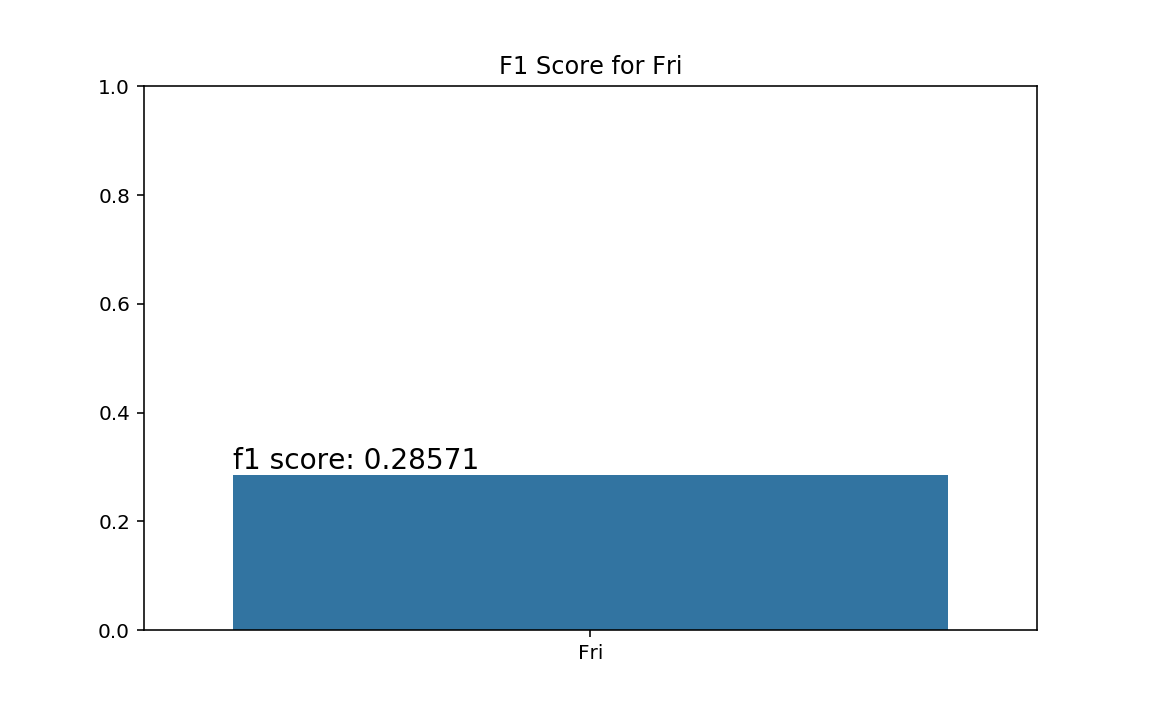
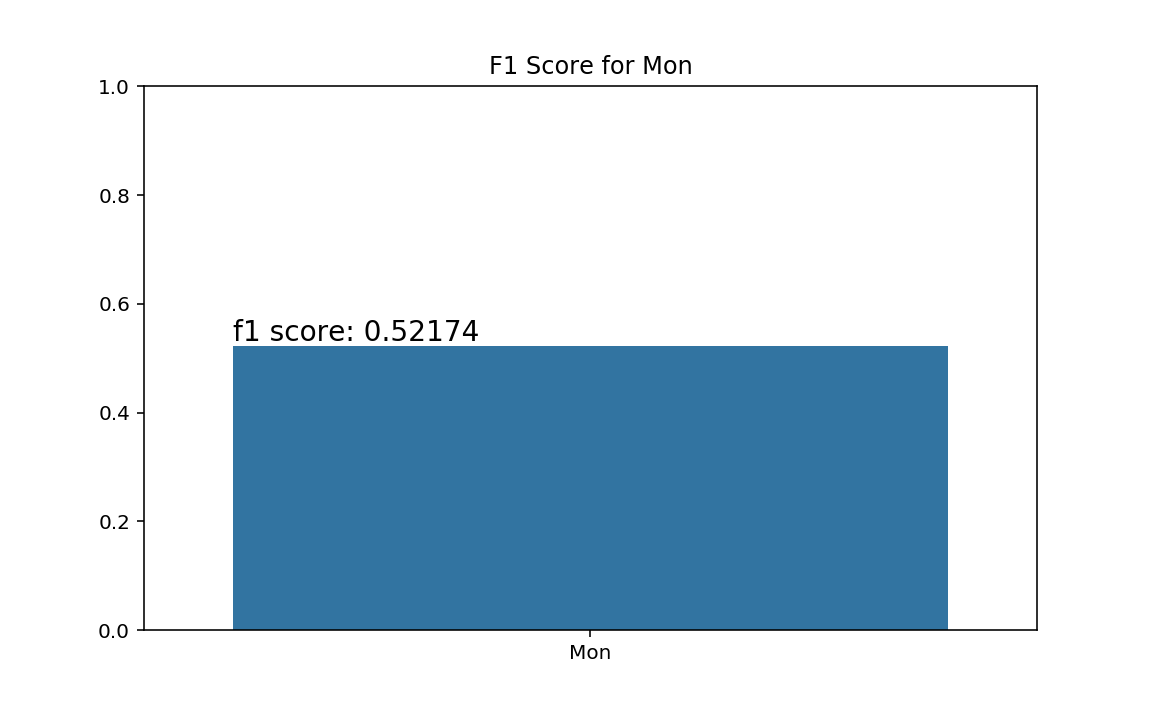
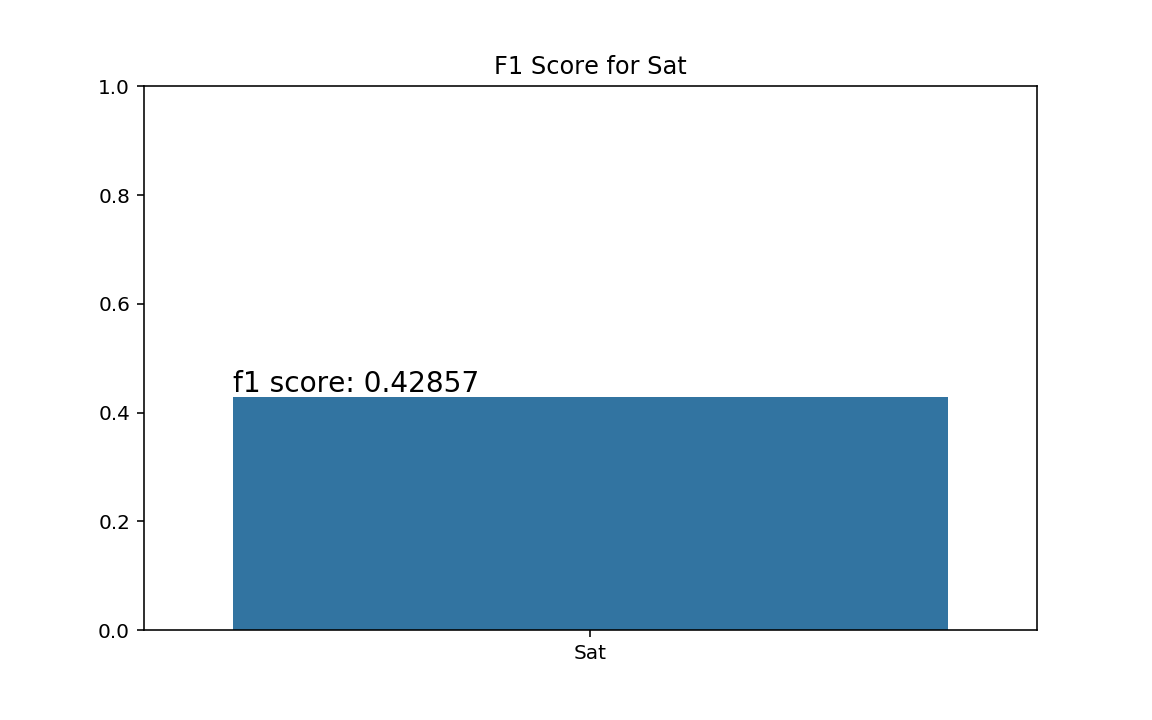
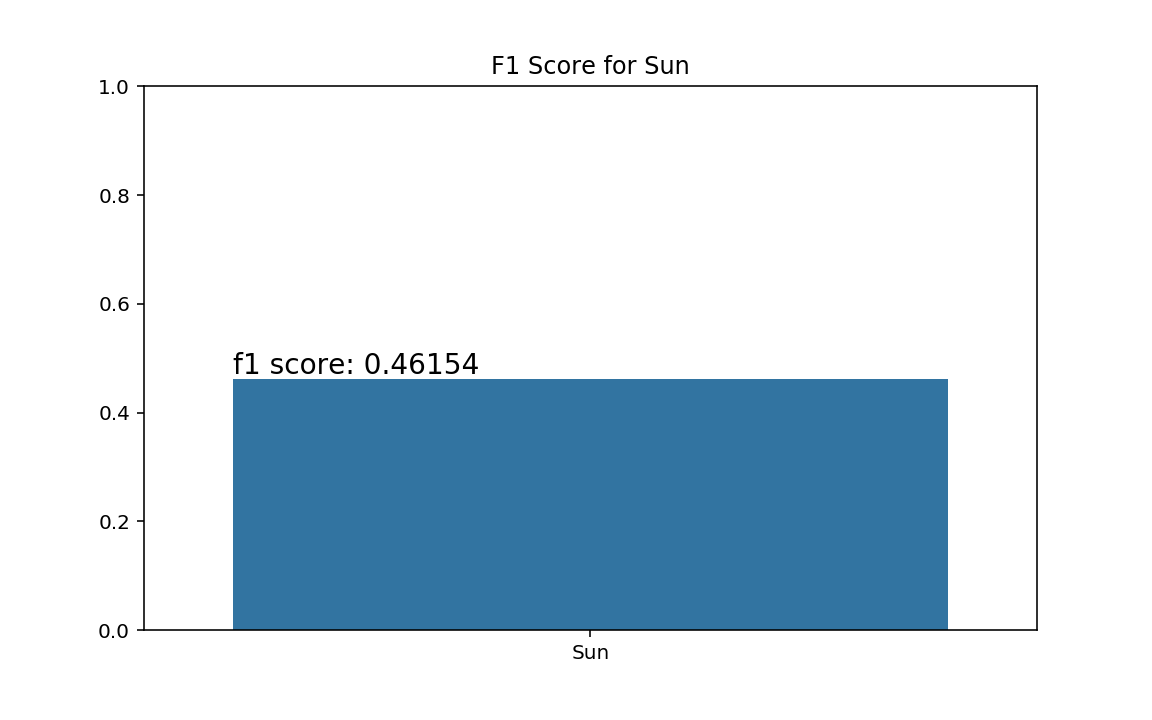
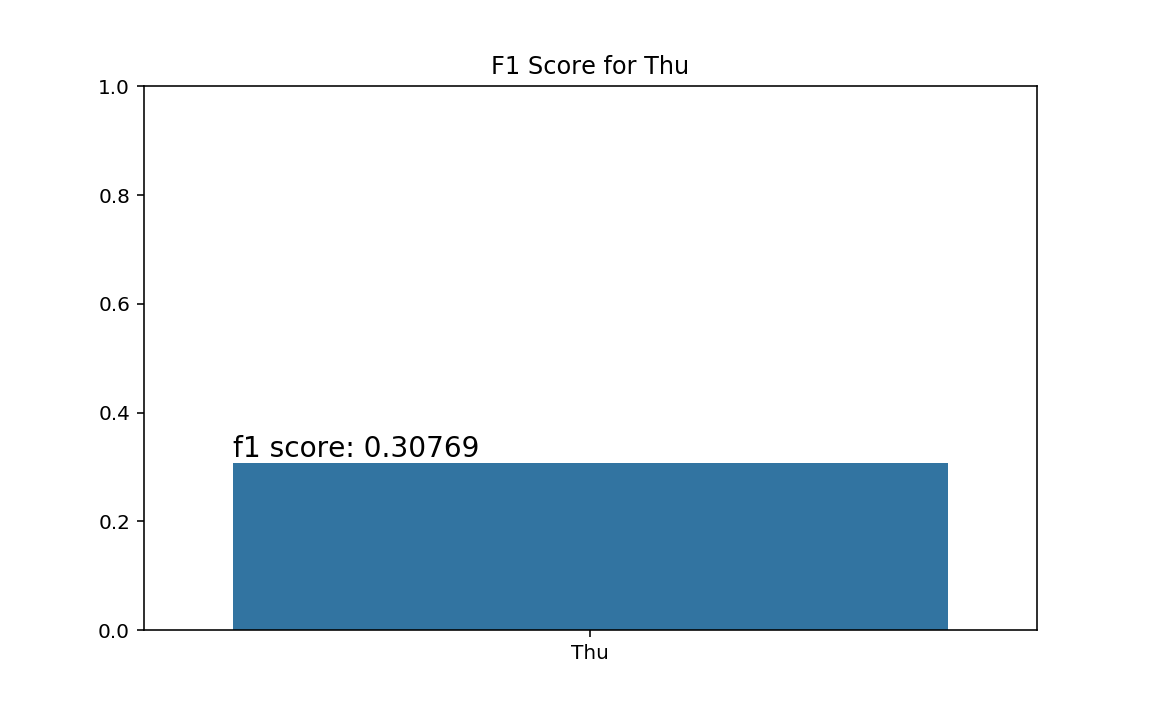
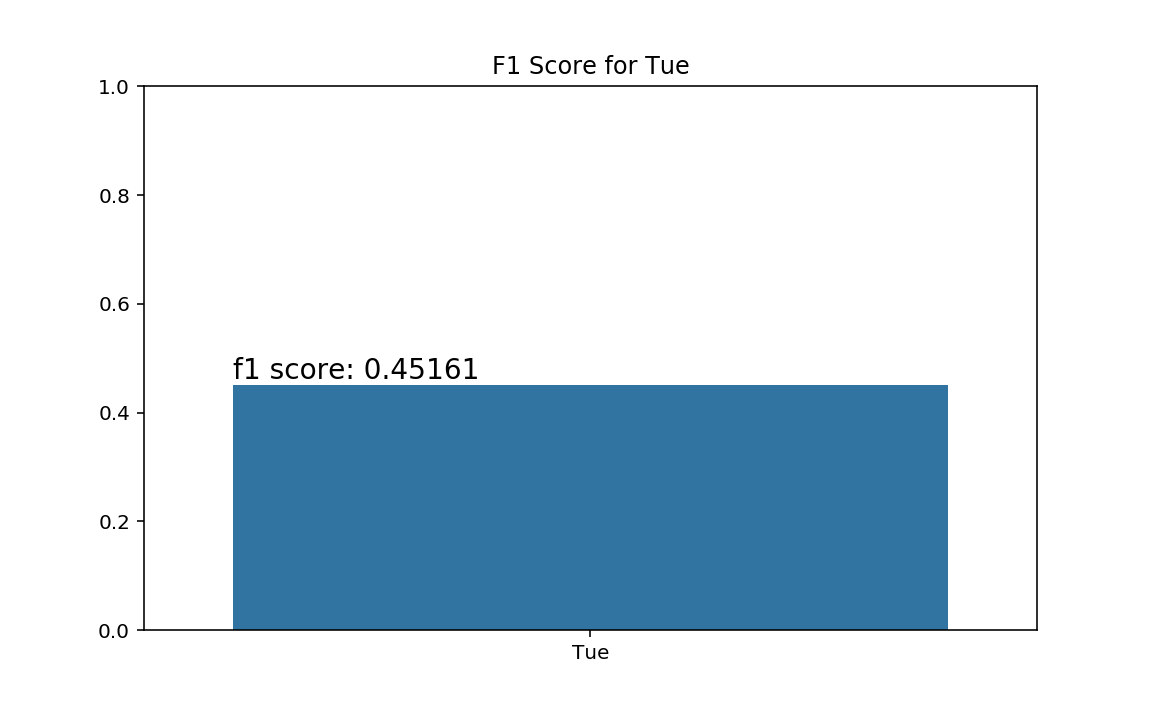
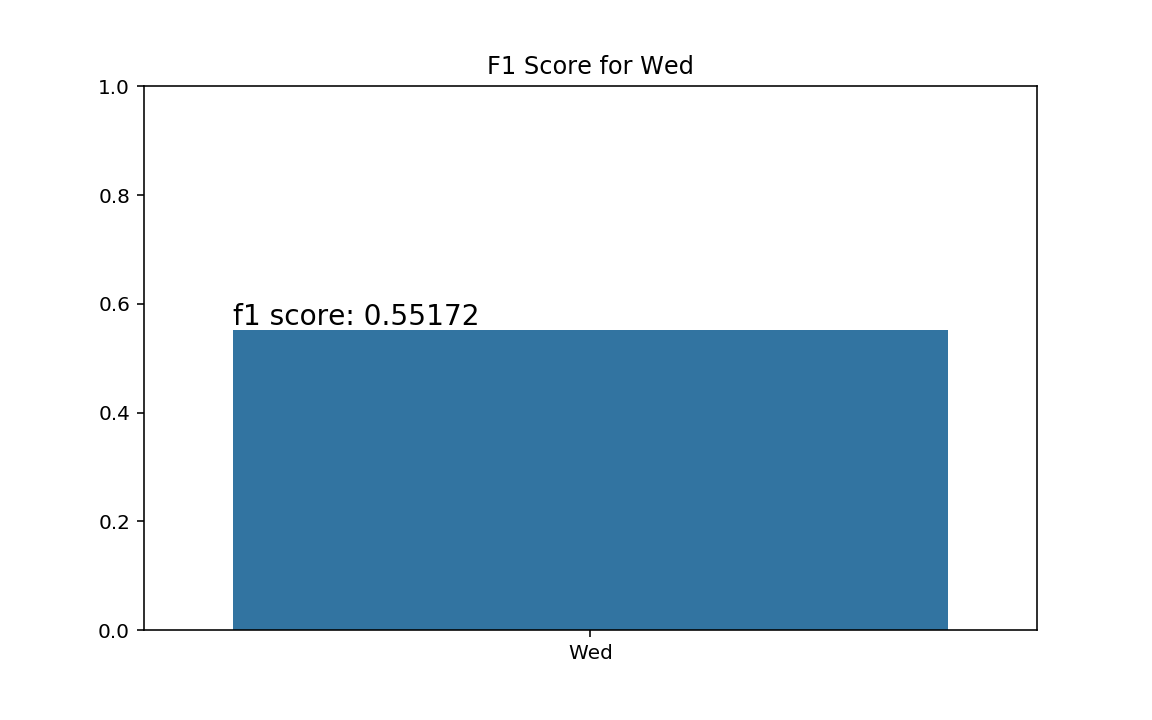
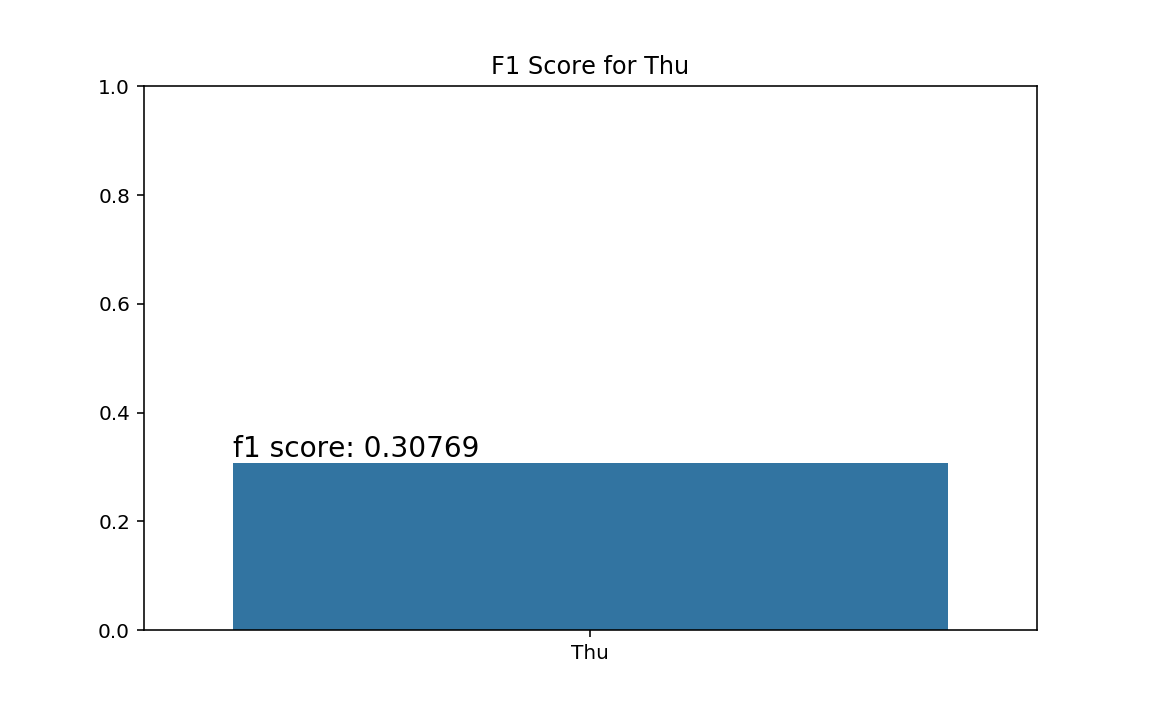

In [177]:
def make_plot(day="Thu"):
    """makes basic plot, which shows f1 score of the day we are interested in"""
    
    fig, ax = plt.subplots(figsize=(8,5))
    ax.set_title(f"F1 Score for {day}")
    ax.set_ylim(0,1)
    
    sns.barplot([day], f1_scores[days.index(day)], ax=ax)
    
     
    for p in ax.patches:
        ax.annotate(f'f1 score: {p.get_height():.5f}', 
                    xy=(p.get_x(), p.get_height()+0.01), fontsize=14)
    
    # we want to return the fig to panel, not display it here thus the plt.close
    plt.close(fig)
    return fig

pn.interact(make_plot, day=days).embed(max_states=7)

### Another plot

This time, I'm making a plot of f1 scores with an option to toggle the two different years:

In [176]:
def get_f1_scores(year=1999):
    """returns f1 scores for a given year"""
    
    df = pd.read_csv("data/test.psv", sep="|", parse_dates=["dates"])

    # and since we need to filter by a particular day lets put in a day col
    df["day_of_week"] = df["dates"].apply(lambda x: x.weekday())
    
    f1_scores = []
    
    ma = df.dates.dt.year == year
    df = df[ma]
    
    for day in np.arange(7):
        ma = df["day_of_week"] == day
        f1 = f1_score(df[ma].y, df[ma].yhat)
        f1_scores.append(f1)
    
    return f1_scores

Column
    [0] Markdown(str)
    [1] RadioButtonGroup(name='Year', options=['1999', '2000'], value='1999')
    [2] ParamFunction(function)
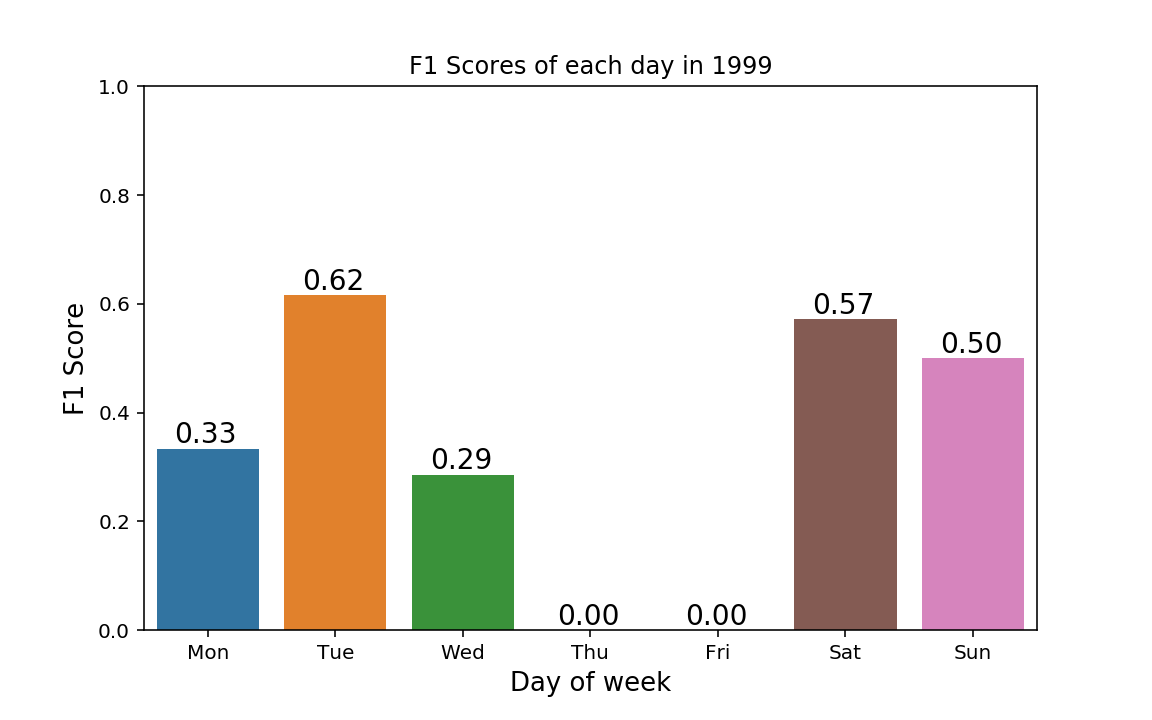

In [175]:
# making the widget to select the year
yr = pn.widgets.RadioButtonGroup(name="Year", options=["1999","2000"])

@pn.depends(yr.param.value)
def make_plot_2(yr):
    """makes basic plot, which shows f1 score of the day we are interested in"""
    fig, ax = plt.subplots(figsize=(8,5))
    
    ax.set_title(f"F1 Scores of each day in {yr}")
    sns.barplot(x=days, y=get_f1_scores(int(yr)), ax=ax)

    ax.set_ylabel("F1 Score", fontsize=13)
    ax.set_xlabel("Day of week", fontsize=13)
    ax.set_ylim(0,1)

    # labelling the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', xy=(p.get_x()+0.14, p.get_height()+0.01), fontsize=14)
    
    # we want to return the fig to panel, not display it here thus the plt.close
    plt.close(fig)
    return fig

pn.Column("**Choose a year**", yr, make_plot_2)